# Introduction

After taking my first course focused on Python, I decided to focus this project getting familiar with the Python syntax, in particular understanding how data cleaning works in the Python environment, and understanding basic plotting functions. While I had higher hopes for my analysis, I ultimately decided to curb my ambition, as data cleaning and data reading (from CSV files) was much more challenging than expected.

# Hypothesis & Research Question

### Primary hypothesis:
There will be a relationship between public sector spending and public sector construction over time; there will be an inverse correlation between non-public sector spending and federal spending over time (because these areas likely have less taxes and/or fewer resources overall)
### Secondary hypothesis:
There will be a relationship between income and private spending in any given U.S. state over time; there will be an inverse between income and public spending in a given U.S. state over time
### How I will answer my question(s)
My primary hypothesis is one that I initially hoped to answer using available data from the U.S. Census Bureau, which has extensive data on public and private infrastructure spending as well as income. After searching for the right dataset for several hours, I realized that I would not be able to study this question, including the concept of spending over time, which would be necessary to establish some sort of a relationship with multiple datapoints. 

This led me to consider the secondary hypothesis, which became the focus of this short study - which looks at the relationship between average income vs. the private sector construction spending in a given state.

# Dataset Evaluation
Data set Evaluation: A brief (250-500 words) that evaluates a data set with respect to one of the FAIR principles, and best practices for data publishing more generally. In the write-up, you might reflect on the challenges that a user of the data set might encounter, or suggest changes to the data set’s documentation or metadata with a view towards enhancing its reusability for future users.

### Evaluation
With regard to the FAIR principles, I would certainly note that the data that I used was certainly "findable" in a straightforward fashion. The data were available on a government website, and explicitly described within the census.gov website. That said, I'm not knowledgable enough in this space to ensure that these data have rich metadata or that the census bureau did in fact attach enough descriptors to make these data easily accessible.
I would say that the data are NOT very interoperable based on the descriptors of FAIR practices. As far as I know, the data do not leverage a common vocabulary for this type of data, they do not clearly reference other data or metadata, and they do not feature a formal, accessible, shared, and broadly applicable language for knowledge representation. 

### Challenges and suggestions
While the U.S. Census Bureau has a great deal of valid and usable data, the consistency in how one accesses the data, in how the data is presented, and in the data's availability as a time series are all lacking. Several pages on the U.S. Census Bureau's webpage (e.g., https://data.census.gov/cedsci/table?q=Income%20and%20Earnings&g=0100000US.04000.001&tid=ACSST1Y2019.S1901&hidePreview=true) appear well-tabulated and well designed, but ultimately, the data can be very unwieldy. For example, in extracting income data for each state in the U.S., there was a large number of unnecessary and poorly-named columns that were difficult to manipulate for a new Python user, and impossible to remove from the exported dataset. On the other side, some of the older Census Bureau data was organized in a more straightforward fashion, but time series data was either not available, or difficult to assemble as it was available in a large number of independent documents. This led me to build useful, but tedious skills in combining files via Python.






https://www.nature.com/articles/sdata201618


# Start of code

Below this point, we will start our code, including installation of some of the key packages needed to run this script, loading of those packages, and then the processing and results. 

In [3]:
#If needed, un-comment these and run them!
#!pip install pandas
#!pip install datatable


In [4]:
import pandas as pd
from pathlib import Path
from datatable import fread, iread, rbind
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

# Reading and cleaning files

The first few code chunks include reading a single .csv file, cleaning the file, and then repeating the process for all remaining data files. You'll notice several commented 'print' commands, which were used to view the data after initially reading it.

Ultimately, the data from all files is put into a single dataframe.

Where appropriate, the acronym 'HMI' refers to household median income.

In [5]:
state_2010 = pd.read_csv (r'/Users/mjungclaus/PycharmProjects/CRDDSProject/raw_data/ACSST1Y2010.csv')   #read the csv file (put 'r' before the path string to address any special characters in the path, such as '\'). Don't forget to put the file name at the end of the path + ".csv"
state_2010 = state_2010.iloc[1: , :]
#print (state_2010)

In [6]:
state_2010=state_2010[['NAME','S1901_C01_013E']]
state_2010.columns=['State','HMI_2010']
print(state_2010)


                   State HMI_2010
1                Alabama    55778
2                 Alaska    81290
3                Arizona    62838
4               Arkansas    52382
5             California    79465
6               Colorado    72423
7            Connecticut    90074
8               Delaware    72550
9   District of Columbia    92959
10               Florida    61877
11               Georgia    62967
12                Hawaii    79560
13                 Idaho    56086
14              Illinois    72022
15               Indiana    58451
16                  Iowa    60901
17                Kansas    63094
18              Kentucky    54320
19             Louisiana    59116
20                 Maine    59300
21              Maryland    89563
22         Massachusetts    84005
23              Michigan    59772
24             Minnesota    71345
25           Mississippi    50591
26              Missouri    59525
27               Montana    56266
28              Nebraska    61630
29            

In [7]:
Tenyr_HMI=state_2010
#print(Tenyr_HMI)

for x in range (1,10):
    df=pd.read_csv (r'/Users/mjungclaus/PycharmProjects/CRDDSProject/raw_data/ACSST1Y201'+str(x)+'.csv')
    df = df.iloc[1: , :]
    df=df[['S1901_C01_013E']]
    df.rename(columns={"S1901_C01_013E": "HMI_201"+str(x)},inplace = True)
    #print(df)
    Tenyr_HMI=pd.concat([Tenyr_HMI, df], axis=1)
    
Tenyr_HMI = Tenyr_HMI.set_index('State')
    
print(Tenyr_HMI)
    
    


                     HMI_2010 HMI_2011 HMI_2012 HMI_2013 HMI_2014 HMI_2015  \
State                                                                        
Alabama                 55778    57208    57372    59294    59464    62307   
Alaska                  81290    82665    84738    88758    89094    92876   
Arizona                 62838    62927    64841    66389    68103    70638   
Arkansas                52382    53204    54116    55547    57693    59275   
California              79465    80848    82159    85707    88595    91757   
Colorado                72423    74852    76489    79381    82295    85915   
Connecticut             90074    92248    94796    97801   100948   101347   
Delaware                72550    76400    74460    76995    78773    81120   
District of Columbia    92959    98177   102160   102882   103525   114600   
Florida                 61877    63006    64229    65728    67510    70462   
Georgia                 62967    63554    65623    67134    6882

Here, I will run a simple mean on all of the HMI values to ensure that the answers are in the right order of magnitude.

In [8]:
Tenyr_HMI.mean(axis=0)

HMI_2010    1.072669e+258
HMI_2011    1.100170e+258
HMI_2012    1.103324e+259
HMI_2013    1.140286e+259
HMI_2014    1.143556e+260
HMI_2015    1.198229e+261
HMI_2016    1.242941e+263
HMI_2017    1.275729e+264
HMI_2018    1.328692e+267
HMI_2019    1.374596e+270
dtype: float64

I now see that all of the numbers from my CSV file were imported to the dataframe as 'float, which might be the reason that our numbers are being stored incorrectly. Now we will convert them all to type 'int' and try to find the mean again. 

In [9]:
Tenyr_HMI=Tenyr_HMI.astype(int)

In [10]:
Tenyr_HMI.mean(axis=0)

HMI_2010    65746.692308
HMI_2011    67436.980769
HMI_2012    68939.500000
HMI_2013    71211.826923
HMI_2014    72805.346154
HMI_2015    75547.903846
HMI_2016    78010.423077
HMI_2017    80686.750000
HMI_2018    83575.596154
HMI_2019    87761.692308
dtype: float64

In [11]:
Tenyr_HMI.mean(axis=1)

State
Alabama                  62296.1
Alaska                   89999.1
Arizona                  71215.5
Arkansas                 59192.9
California               92820.0
Colorado                 85180.2
Connecticut             101582.2
Delaware                 80556.5
District of Columbia    111014.5
Florida                  70550.0
Georgia                  72313.0
Hawaii                   91018.5
Idaho                    65003.3
Illinois                 82024.8
Indiana                  66765.6
Iowa                     70256.9
Kansas                   71764.7
Kentucky                 62201.9
Louisiana                64409.3
Maine                    67302.1
Maryland                 99859.8
Massachusetts            98065.4
Michigan                 69254.2
Minnesota                83240.5
Mississippi              56380.1
Missouri                 67546.0
Montana                  65476.9
Nebraska                 71395.7
Nevada                   72374.0
New Hampshire            88091.6
New 

We're all set - the numbers are registering correctly!

There are quite a few decimal places after each HMI value, but that's OK for the purposes of this project. In a more advanced project, I might limit the decimal places to make the numbers more readable.

Now, let's clean our next data set and get it ready for prime time, using the lessons that we learned from the HMI data.

In [12]:
Tenyr_const = pd.read_csv (r'/Users/mjungclaus/PycharmProjects/CRDDSProject/raw_data/State_Private_Spend.csv')   #read the csv file (put 'r' before the path string to address any special characters in the path, such as '\'). Don't forget to put the file name at the end of the path + ".csv"
Tenyr_const = Tenyr_const.set_index('State')
Tenyr_const=Tenyr_const.iloc[:,7:17]
Tenyr_const=Tenyr_const.sort_values(by='State')
Tenyr_const = Tenyr_const.replace(',','', regex=True)
Tenyr_const=Tenyr_const.astype(int)

#print(Tenyr_const)
#Tenyr_const = Tenyr_const.iloc[1: , :]

In [13]:
Tenyr_const.mean(axis=0)

2010    3342.745098
2011    3283.588235
2012    3720.274510
2013    4041.019608
2014    4630.843137
2015    5527.803922
2016    6139.411765
2017    6291.274510
2018    6645.431373
2019    6999.588235
dtype: float64

In [14]:
Tenyr_const.mean(axis=1)


State
Alabama                  3510.9
Alaska                    367.9
Arizona                  4825.8
Arkansas                 1921.8
California              19667.6
Colorado                 5176.1
Connecticut              2015.9
Delaware                  741.5
District of Columbia     1802.4
Florida                 12993.7
Georgia                  7338.3
Hawaii                   1107.4
Idaho                    1129.9
Illinois                 8417.7
Indiana                  5612.3
Iowa                     4872.0
Kansas                   2864.3
Kentucky                 3586.4
Louisiana                9975.3
Maine                     616.1
Maryland                 3316.1
Massachusetts            7954.4
Michigan                 5893.8
Minnesota                3979.8
Mississippi              1665.8
Missouri                 4289.6
Montana                   776.5
Nebraska                 1767.7
Nevada                   3499.9
New Hampshire             797.0
New Jersey               4885.1
Ne

Everything looks to be working well. Time to move on to analysis.

# Data analysis and plots

We'll start analyzing this data by plotting each variable for every state in 2010 in one graphic. I expect that this might look chaotic, but let's see what happens!

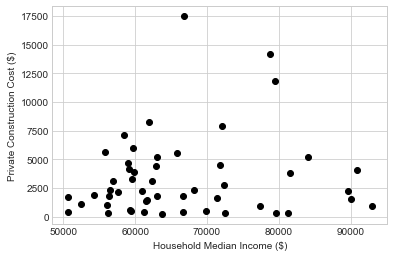

In [15]:
Tenyr_HMI_states=Tenyr_HMI.drop(['Puerto Rico'])
#print(Tenyr_HMI)

Tenyr_comb = pd.concat([Tenyr_HMI_states, Tenyr_const], axis=1)

x = Tenyr_comb["HMI_2010"]
y = Tenyr_comb["2010"]

plt.xlabel('Household Median Income ($)')

plt.ylabel('Private Construction Spend ($)')

plt.plot(x, y, 'o', color='black');

I thought of a lot, but I did not think of everything! 

While the X and Y axis labels look good, we could use a chart title.

Further, if we plan to plot multiple sets of data, we should either limit the amount of data (top 10 or bottom 10 for a given category, making sure that our states are consistent) or work with some different colors.

Let's start by taking the top 10 HMIs in 2010, applying a color, and applying a graphic title.

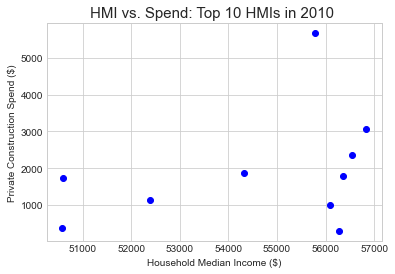

In [16]:
#Now, let's pick the top 10 for HMI and plot those

Tenyr_comb=Tenyr_comb.sort_values(by='HMI_2010')


x1 = Tenyr_comb.head(10)["HMI_2010"]
y1 = Tenyr_comb.head(10)["2010"]


plt.xlabel('Household Median Income ($)')

plt.ylabel('Private Construction Spend ($)')

plt.title("Top 10 HMIs in 2010 ",fontsize=15)

    
plt.plot(x1, y1, 'o', color='blue');



#print(x2)
#print(y2)

That was an effective way of titling the chart and limiting the data! Now that we can use different colors though, let's add more data for more years where we have HMI data. In the next plot, we'll add data for 2014 and 2019. 

To do this, we'll need to create 3 sets of X and Y coordinates.

As with the last plot, this will also focus on the top 10 HMIs. In sorting the values, I was careful to ensure that a given state's data would stay together, by making the state name the row name index.

In hindsight, I realize that there should be a legend for this plot and the next one, but I ran into several issues in trying to do so. Ultimately, I decided to leave this without a legend so that I could focus on wrapping up the project. 

Further, in these circumstances, I could use Markdown to identify 
- blue = 2010
- red = 2014
- green = 2019

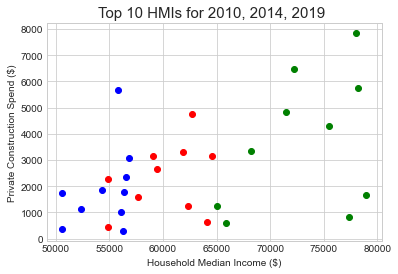

In [18]:
#Now, let's do it for a few different years

Tenyr_comb=Tenyr_comb.sort_values(by='HMI_2010')


x1 = Tenyr_comb.head(10)["HMI_2010"]
y1 = Tenyr_comb.head(10)["2010"]
x2 = Tenyr_comb.head(10)["HMI_2014"]
y2 = Tenyr_comb.head(10)["2014"]
x3 = Tenyr_comb.head(10)["HMI_2019"]
y3 = Tenyr_comb.head(10)["2019"]

plt.xlabel('Household Median Income ($)')

plt.ylabel('Private Construction Spend ($)')

plt.title("Top 10 HMIs for 2010, 2014, 2019 ",fontsize=15)
    
plt.plot(x1, y1, 'o', color='blue');
plt.plot(x2, y2, 'o', color='red');
plt.plot(x3, y3, 'o', color='green');

#plt.legend()

#print(x2)
#print(y2)


Now, I'll drop the 'head' to look at ALL points by year on one graph. Again, this will get chaotic, but could be interesting to view.

Becauset here is no legend on the graphic, I will remind the reader that:
- blue = 2010
- red = 2014
- green = 2019

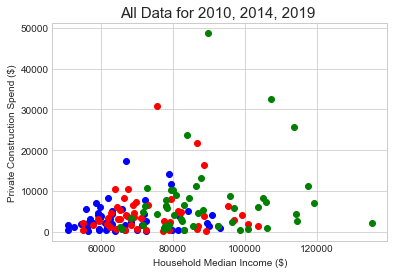

In [19]:

Tenyr_comb=Tenyr_comb.sort_values(by='HMI_2010')


x1 = Tenyr_comb["HMI_2010"]
y1 = Tenyr_comb["2010"]
x2 = Tenyr_comb["HMI_2014"]
y2 = Tenyr_comb["2014"]
x3 = Tenyr_comb["HMI_2019"]
y3 = Tenyr_comb["2019"]

plt.xlabel('Household Median Income ($)')

plt.ylabel('Private Construction Spend ($)')

plt.title("All Data for 2010, 2014, 2019 ",fontsize=15)

    
plt.plot(x1, y1, 'o', color='blue');
plt.plot(x2, y2, 'o', color='red');
plt.plot(x3, y3, 'o', color='green');

It also seems that there could be some interesting patterns down at the bottom of the dataset (tail), so we will create a combined graphic with just the lowest HMIs.

Becauset here is no legend on the graphic, I will remind the reader that:
- blue = 2010
- red = 2014
- green = 2019

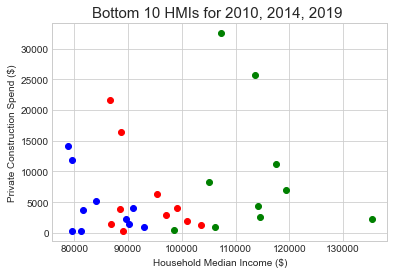

In [20]:
Tenyr_comb=Tenyr_comb.sort_values(by='HMI_2010')


x1 = Tenyr_comb.tail(10)["HMI_2010"]
y1 = Tenyr_comb.tail(10)["2010"]
x2 = Tenyr_comb.tail(10)["HMI_2014"]
y2 = Tenyr_comb.tail(10)["2014"]
x3 = Tenyr_comb.tail(10)["HMI_2019"]
y3 = Tenyr_comb.tail(10)["2019"]

plt.xlabel('Household Median Income ($)')

plt.ylabel('Private Construction Spend ($)')

plt.title("Bottom 10 HMIs for 2010, 2014, 2019 ",fontsize=15)

    
plt.plot(x1, y1, 'o', color='blue');
plt.plot(x2, y2, 'o', color='red');
plt.plot(x3, y3, 'o', color='green');

Finally, I'd like to create a best fit line for each year of data to practice different Python skills.

Ideally, this could be run on different segments of the data - with consideration for outliers or other needs to modify the data. That said, this is for the sake of education and learning, so I will simply run it for all of the available data, rather than for subsets.

Becauset here is no legend on the graphic, I will remind the reader that:
- blue = 2010
- red = 2014
- green = 2019

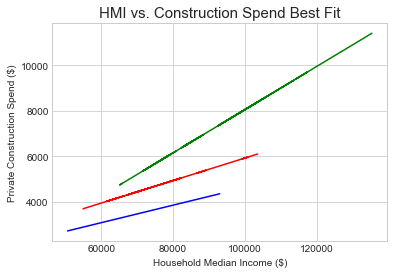

In [22]:
Tenyr_comb=Tenyr_comb.sort_values(by='HMI_2010')


x1 = Tenyr_comb["HMI_2010"]
y1 = Tenyr_comb["2010"]
m1, b1 = np.polyfit(x1, y1, 1)
x2 = Tenyr_comb["HMI_2014"]
y2 = Tenyr_comb["2014"]
m2, b2 = np.polyfit(x2, y2, 1)
x3 = Tenyr_comb["HMI_2019"]
y3 = Tenyr_comb["2019"]
m3, b3 = np.polyfit(x3, y3, 1)

plt.xlabel('Household Median Income ($)')

plt.ylabel('Private Construction Spend ($)')

plt.title("HMI vs. Construction Spend Best Fit",fontsize=15)

    
plt.plot(x1, m1*x1+b1, color='blue');
plt.plot(x2, m2*x2+b2, color='red');
plt.plot(x3, m3*x3+b3, color='green');
#plt.plot(x, m*x + b)


# Parting thoughts

These graphics do show interesting patterns in the data, though I've only scratched the surface of what is possible with Python. Really, I chose a number of data cleaning and interpretation methods that were already familiar to me so that I could learn the Python syntax and fumble through a large number of errors that I encountered during this journey.

In the future, to improve this data analysis, I would do a few things:
- Provide more time for finding data. Because I was unable to find exactly the right data to answer my initial hypothesis, I changed gears a few times.
- Spend more time thinking about outliers and patterns. This would have allowed for clearer analyses, better conclusions, and cleaner data. Instead, I focused on getting something together with the data that I had (rather than professionally cleaning and analyzing the data).
- Figure out legends for my graphics. I tried and failed to successfully do so, but I have access to some articles that would help me work through labeling my legends correctly.
- Write up a thorough analysis - I didn't feel this was worthwhile at this point, because I am more focused on learning the language than choosing statistical tests that would help me draw stronger conclusions.

Thank you so much for an excellent and engaging class!